## Linear Regression model to predict rating

In [1]:
# Import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# Read in the dataset
zomato_df = pd.read_csv(Path('../Resources/zomato.csv'), encoding = "ISO-8859-1")
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## Preprocess data

In [3]:
# View a list of all of the columns
zomato_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
# Drop columns that are not relevant to the analysis / will confuse the model
zomato_df = zomato_df.drop(columns=[
    'Restaurant ID',
    'Restaurant Name',
    'Country Code',
    'City',
    'Address', 
    'Locality', 
    'Locality Verbose', 
    'Longitude',
    'Latitude',
    'Average Cost for two',
    'Currency',
    'Rating color',
    'Rating text',
    'Votes'
])
zomato_df.head()

,Cuisines,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating
0,"French, Japanese, Desserts",Yes,No,No,No,3,4.8
1,Japanese,Yes,No,No,No,3,4.5
2,"Seafood, Asian, Filipino, Indian",Yes,No,No,No,4,4.4
3,"Japanese, Sushi",No,No,No,No,4,4.9
4,"Japanese, Korean",Yes,No,No,No,4,4.8


In [5]:
# Determine the number of unique values in each column.
zomato_df.nunique()

Cuisines                1825
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
dtype: int64

In [6]:
# Look at Cuisines value counts for binning
cui_counts = zomato_df.Cuisines.value_counts()
print(cui_counts)

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64


### Check for linearity among independent and dependent variables

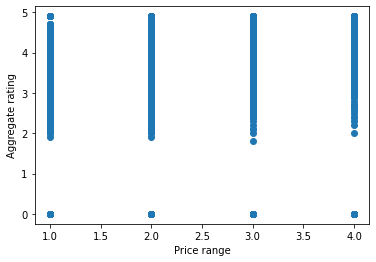

In [7]:
# Plot the independent and dependent variables on a scatter plot to check for linearity
plt.scatter(zomato_df['Price range'], zomato_df['Aggregate rating'])
plt.xlabel('Price range')
plt.ylabel('Aggregate rating')
plt.show()

### Define variables and Split the data into train and test sets

In [8]:
# Create our features
X = zomato_df.drop(columns="Aggregate rating")
X = pd.get_dummies(X)


# Create our target
y = zomato_df["Aggregate rating"]

In [9]:
# View summary statistics for 'X' (features)
X.describe()

,Price range,Cuisines_Afghani,"Cuisines_Afghani, Mughlai, Chinese","Cuisines_Afghani, North Indian","Cuisines_Afghani, North Indian, Pakistani, Arabian",Cuisines_African,"Cuisines_African, Portuguese",Cuisines_American,"Cuisines_American, Asian, Burger","Cuisines_American, Asian, European, Seafood",...,Cuisines_World Cuisine,"Cuisines_World Cuisine, Mexican, Italian","Cuisines_World Cuisine, Patisserie, Cafe",Has Table booking_No,Has Table booking_Yes,Has Online delivery_No,Has Online delivery_Yes,Is delivering now_No,Is delivering now_Yes,Switch to order menu_No
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,...,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.0
mean,1.804837,0.000419,0.000105,0.000105,0.000105,0.000105,0.000105,0.003246,0.000105,0.000105,...,0.000105,0.000105,0.000105,0.878756,0.121244,0.743378,0.256622,0.996440,0.003560,1.0
std,0.905609,0.020461,0.010232,0.010232,0.010232,0.010232,0.010232,0.056882,0.010232,0.010232,...,0.010232,0.010232,0.010232,0.326428,0.326428,0.436792,0.436792,0.059561,0.059561,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.0
75%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.0
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [10]:
# Check the balance of our target values
y.value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Create the model

In [12]:
# Create a model with scikit-learn
model = LinearRegression()

### Fit the model

In [13]:
# Fit the data into the model
# By convention, X is capitalized and y is lowercase
model.fit(X_train, y_train)

LinearRegression()

In [14]:
# The model creates predicted y values based on X values
y_pred = model.predict(X_test)
print(y_pred.shape)

(2388,)


In [15]:
# # Plot the results. The best fit line is red.
# plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')
# plt.show()

In [16]:
# The slope
# The y-intercept

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 6.28977554e-01 -3.69285904e+00  1.56654660e+12 ...  7.39362935e+12
  7.39362935e+12  0.00000000e+00]
Intercept: 45256810865988.46


In [17]:
# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, y_pred))
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  1.871261795275058e+24
mean_absolute_error :  112125393174.79608


### Build the multiple linear regression equation as follows:

In [ ]:
# Aggregate rating = (model.intercept_) + 
                    # (model.coef_[0])*X1 + 
                    # (model.coef_[1])*X2 + 
                    # (model.coef_[2])*X3 + 
                    # (model.coef_[3])*X4 + 
                    # (model.coef_[4])*X5 + 
                    # (model.coef_[5])*X6